# Goal
### Create suitable categorical variables, choose most significant variables, choose two prediction models and and pick the best one

In [1]:
import seaborn as sns

In [232]:
import pandas as pd; pd.set_option('display.max_columns', 1000); pd.set_option('display.max_rows', 1000) ; pd.set_option('display.width', 1000)
import numpy as np
#import the cleaned and preprocessed data ready for prediction analysis
san_fran_df = pd.read_csv('data_for_prediction.csv')

In [4]:
import mapclassify
from geopy.distance import geodesic

In [5]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


## create a new column idle_time_end
this column shows the idle_time for each bike in the same row that the rental has been ended, corresponding dirrectly to the idle time at the end station

In [236]:
#sort the san_fran_df by bike_id and start_time to perform operation with idle_time
san_fran_df.sort_values(['bike_id', 'start_time'], inplace=True)
san_fran_df['idle_time']

1160                   NaN
1735       0 days 01:32:38
3554       0 days 19:49:39
4775       0 days 07:33:35
5025       0 days 03:10:19
                ...       
1361287    0 days 01:16:38
1361797    0 days 02:15:45
1362215    0 days 01:50:53
1362390    0 days 01:43:51
1362480    0 days 01:19:27
Name: idle_time, Length: 1362601, dtype: object

In [237]:
#move all the values of the idle_time in each row one place up, so that it directly reflects the idle_time of the end station in the same row
san_fran_df['idle_time_end'] = san_fran_df['idle_time'].shift(-1)


In [238]:
san_fran_df['idle_time_end']

1160       0 days 01:32:38
1735       0 days 19:49:39
3554       0 days 07:33:35
4775       0 days 03:10:19
5025       0 days 00:12:10
                ...       
1361287    0 days 02:15:45
1361797    0 days 01:50:53
1362215    0 days 01:43:51
1362390    0 days 01:19:27
1362480               None
Name: idle_time_end, Length: 1362601, dtype: object

In [239]:
san_fran_df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,geometry,area_label,idle_time_end
1160,2018-01-02 07:32:44,2018-01-02 07:44:36,60,37.774520,-122.409449,324,37.788300,-122.408531,17,0 days 00:11:52,NaN,1 days 07:32:44,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.65,1021.65,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.531567,POINT (-122.4094493687 37.7745204011),2,0 days 01:32:38
1735,2018-01-02 09:17:14,2018-01-02 09:23:41,324,37.788300,-122.408531,37,37.785000,-122.395936,17,0 days 00:06:27,0 days 01:32:38,0 days 13:09:25,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.31,1021.31,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.168362,POINT (-122.4085307121 37.7882999782),2,0 days 19:49:39
3554,2018-01-03 05:13:20,2018-01-03 05:15:55,37,37.785000,-122.395936,21,37.789625,-122.400811,17,0 days 00:02:35,0 days 19:49:39,0 days 00:00:00,14.0,14.0,26.0,26.0,Cloudy,Cloudy,1018.60,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,2,0,0.0,3,0,0.669345,POINT (-122.3959356175 37.7849997283),2,0 days 07:33:35
4775,2018-01-03 12:49:30,2018-01-03 13:11:05,53,37.775946,-122.437777,5,37.783899,-122.408445,17,0 days 00:21:35,0 days 07:33:35,0 days 00:00:00,12.0,12.0,27.0,27.0,Mostly Cloudy,Mostly Cloudy,1016.57,1016.57,6.0,6.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,2.730661,POINT (-122.4377775 37.775946),2,0 days 03:10:19
5025,2018-01-03 16:21:24,2018-01-03 16:26:19,5,37.783899,-122.408445,25,37.787522,-122.397405,17,0 days 00:04:55,0 days 03:10:19,0 days 06:49:53,11.0,12.0,28.0,26.0,Mostly Cloudy,Cloudy,1016.23,1016.57,0.0,7.0,0.0,0.0,11.0,12.0,2,0,-1.0,2,0,1.052319,POINT (-122.4084448814 37.7838993571),2,0 days 00:12:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361287,2018-12-31 13:07:21,2018-12-31 13:21:59,364,37.772886,-122.389940,3,37.786375,-122.404904,6234,0 days 00:14:38,0 days 01:16:38,5 days 01:46:03,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.994864,POINT (-122.3899403214 37.7728857923),2,0 days 02:15:45
1361797,2018-12-31 15:37:44,2018-12-31 15:59:07,3,37.786375,-122.404904,24,37.789677,-122.390428,6234,0 days 00:21:23,0 days 02:15:45,19 days 05:43:16,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.326710,POINT (-122.4049043655 37.7863752686),2,0 days 01:50:53
1362215,2018-12-31 17:50:00,2018-12-31 18:00:09,24,37.789677,-122.390428,78,37.773717,-122.411647,6234,0 days 00:10:09,0 days 01:50:53,20 days 01:03:02,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,2.575179,POINT (-122.3904285 37.7896767),2,0 days 01:43:51
1362390,2018-12-31 19:44:00,2018-12-31 19:55:02,78,37.773717,-122.411647,119,37.761047,-122.432642,6234,0 days 00:11:02,0 days 01:43:51,0 days 01:42:45,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,2.323699,POINT (-122.4116467 37.7737172),2,0 days 01:19:27


# Choosing the most relevant features for the predictive model

In [240]:
san_fran_df = san_fran_df.drop('geometry', axis=1)

# POI features

In [241]:
#importing POI data
north_cali_loc = pd.read_csv('NorthernCalifornia_POIs', low_memory=False)
north_cali_loc = north_cali_loc.drop('geometry', axis=1)
pois_df = gpd.GeoDataFrame(north_cali_loc, geometry=gpd.points_from_xy(north_cali_loc['lon'], north_cali_loc['lat']))

In [242]:
pois_df.head()

,Unnamed: 0,version,timestamp,changeset,id,tags,lat,lon,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,operator,phone,ref,url,website,amenity,atm,bank,bicycle_parking,bicycle_rental,bar,building,building:levels,cafe,car_wash,drinking_water,fast_food,fountain,fuel,gambling,ice_cream,internet_access,kindergarten,landuse,library,office,parking,police,school,social_facility,source,start_date,theatre,university,wikipedia,agrarian,alcohol,bakery,bicycle,books,car,clothes,coffee,collector,computer,cosmetics,craft,dry_cleaning,fireplace,furniture,gas,hairdresser,kiosk,kitchen,lottery,massage,medical_supply,model,motorcycle,music,musical_instrument,organic,outdoor,pet,religion,second_hand,shoes,shop,ski,supermarket,trade,video,water,wholesale,wine,attraction,camp_site,guest_house,information,museum,tourism,viewpoint,zoo,osm_type,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres,geometry
0,0,3,1567817615,0.0,15972546,"{""brand"":""Chase"",""brand:wikidata"":""Q524629"",""b...",36.979366,-122.02073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase,NaN,NaN,NaN,NaN,NaN,NaN,bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.02073 36.97937)
1,1,9,1511822788,0.0,26637661,"{""direction"":""45-112"",""ele"":""1343"",""name:zh"":""...",37.715797,-119.67690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tunnel View,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USGS Topo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,viewpoint,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-119.67690 37.71580)
2,2,5,1413753424,0.0,29946571,"{""access"":""public""}",40.685482,-121.41899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toilets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.41899 40.68548)
3,3,1,1190872143,0.0,33112985,"{""created_by"":""JOSM""}",41.823452,-121.50175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Captain Jack's Stronghold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.50175 41.82345)
4,4,2,1250367159,0.0,33113436,NaN,41.758180,-121.56817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fleener Chimneys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.56817 41.75818)


In [243]:
pois_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 206875 entries, 0 to 206874
Columns: 114 entries, Unnamed: 0 to geometry
dtypes: float64(3), geometry(1), int64(3), object(107)
memory usage: 179.9+ MB


In [244]:
#drop useless columns in pois_df
columns_to_drop = ['Unnamed: 0','tags', 'operator', 'phone', 'ref', 'url', 'website', 'addr:city', 'addr:country', 'addr:full','addr:housenumber', 'addr:housename', 'addr:postcode', 'addr:place', 'addr:street', 'email']
pois_df = pois_df.drop(columns_to_drop,axis=1)

In [245]:
name = pois_df['name'].unique().tolist()
print(name)



['Chase', 'Tunnel View', nan, "Captain Jack's Stronghold", 'Fleener Chimneys', 'The Rock', 'Big Painted Cave Trail Parking', 'Schonchin Butte Parking', 'Declaring Peace Through All Our Relations', 'Gillespie Youth Camp', 'Lava Beds Visitor Center', 'Hospital Rock', 'Gillems Camp', 'Canby Cross', 'Wildlife Overlook', 'Thomas-Wright Battlefield', 'Black Crater', 'Devils Homestead Overlook', 'Heppe Cave', 'Mammoth Crater', 'Hidden Valley', 'Garden Bridges', 'Indian Well Campground', 'Bunchgrass Overlook', 'Woods Lowside', 'Toronado', "Molotov's", 'Noc Noc', 'Danny Coyles', 'The Page', "Martuni's", "Hobson's Choice", 'Magnolia Pub & Brewery', 'The Gold Cane', 'Club Deluxe', 'Trax', 'Aub Zam Zam', 'United States Post Office - Gateway Station', 'Comstock Saloon', "Mr. Bing's", 'Irish Times', 'Old Ship Saloon', "Dragon's Gate", 'Nancy Brown Kantz', 'Fitzgerald Marine Reserve', 'Rotary Peace Grove', 'Hidden Valley Trailhead', 'College of the Redwoods - Eureka Campus', 'Tish Tang Trailhead', 'C

In [246]:
#look up all unique values in column 'amenity'
amenity = pois_df['amenity'].unique().tolist()
print(amenity)

['bank', nan, 'toilets', 'drinking_water', 'parking', 'bench', 'pub', 'bar', 'post_box', 'post_office', 'parking_entrance', 'school', 'weighbridge', 'bus_station', 'cinema', 'trailer_park', 'restaurant', 'atm', 'ranger_station', 'fast_food', 'fuel', 'pharmacy', 'fire_station', 'place_of_worship', 'fountain', 'recycling', 'police', 'ferry_terminal', 'prison', 'telephone', 'cafe', 'bicycle_parking', 'veterinary', 'community_centre', 'nightclub', 'townhall', 'library', 'clock', 'ice_cream', 'clinic', 'theatre', 'doctors', 'car_rental', 'prep_school', 'dentist', 'winery', 'toilets_closed', 'shelter', 'animal_boarding', 'car_wash', 'music_venue', 'grave_yard', 'kindergarten', 'college', 'university', 'language_school', 'nursing_home', 'hospital', 'social_facility', 'Residential care facility', 'studio', 'social_centre', 'public_building', 'arts_centre', 'courthouse', 'planetarium', 'waste_basket', 'loading_dock', 'taxi', 'car_sharing', 'waste_container', 'vending_machine', 'bicycle_rental',

## King street station

In [247]:
# we use the coordinates of the Tahoe Convoy bus station as a placeholder of the coordinates for the King street station
central_station = pois_df_geo[pois_df_geo['name'] == 'Tahoe Convoy']
central_station




,version,timestamp,changeset,id,lat,lon,name,opening_hours,amenity,atm,bank,bicycle_parking,bicycle_rental,bar,building,building:levels,cafe,car_wash,drinking_water,fast_food,fountain,fuel,gambling,ice_cream,internet_access,kindergarten,landuse,library,office,parking,police,school,social_facility,source,start_date,theatre,university,wikipedia,agrarian,alcohol,bakery,bicycle,books,car,clothes,coffee,collector,computer,cosmetics,craft,dry_cleaning,fireplace,furniture,gas,hairdresser,kiosk,kitchen,lottery,massage,medical_supply,model,motorcycle,music,musical_instrument,organic,outdoor,pet,religion,second_hand,shoes,shop,ski,supermarket,trade,video,water,wholesale,wine,attraction,camp_site,guest_house,information,museum,tourism,viewpoint,zoo,osm_type,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres,geometry
79303,2,1617944594,0.0,8418786287,37.775352,-122.39713,Tahoe Convoy,NaN,bus_station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.397 37.775)


In [252]:
def calculate_distance(row, lat, lon, central_station):
    location = (row[lat], row[lon])
    target_location = (central_station['lat'], central_station['lon'])
    return geodesic(location, target_location).kilometers

central_station = {'lat': 37.775352, 'lon': -122.39713}
""" we will not let this run due to time constraints
san_fran_df['start_station_central_station_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'start_station_lat', 'start_station_lon', central_station), axis=1)

In [ ]:
#we could also try to run this for the end_station but because the idle_time in each row corresponds to the 
#start_station in the same row it makes no sense to do that for the prediction as those two values are not connected
"""
san_fran_df_geo['end_station_central_station_dist'] = san_fran_df_geo.apply(lambda row: calculate_distance(row, 'end_station_lat',
'end_station_lon', central_station), axis=1)
"""

## Twitter HQ
for comparison we will also choose more random point from the map where there also was a lot of rentals, such as a place in the vicinity of the Twitter HQ

In [347]:
twitter_HQ = {"lat": 37.7767414, "lon": -122.4165504}
#san_fran_df['start_station_twitter_HQ_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'start_station_lat', 'start_station_lon', twitter_HQ), axis=1)

In [354]:
san_fran_df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist,end_area_label,start_station_twitter_HQ_dist
0,2018-01-02 09:17:14,2018-01-02 09:23:41,324,37.788300,-122.408531,37,37.785000,-122.395936,17,0 days 00:06:27,0 days 01:32:38,0 days 13:09:25,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.31,1021.31,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.168362,2,0 days 19:49:39,1.753276,1.400463,2,1.464568
1,2018-01-03 05:13:20,2018-01-03 05:15:55,37,37.785000,-122.395936,21,37.789625,-122.400811,17,0 days 00:02:35,0 days 19:49:39,0 days 00:00:00,14.0,14.0,26.0,26.0,Cloudy,Cloudy,1018.60,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,2,0,0.0,3,0,0.669345,2,0 days 07:33:35,1.075981,1.022033,2,2.034235
2,2018-01-03 12:49:30,2018-01-03 13:11:05,53,37.775946,-122.437777,5,37.783899,-122.408445,17,0 days 00:21:35,0 days 07:33:35,0 days 00:00:00,12.0,12.0,27.0,27.0,Mostly Cloudy,Mostly Cloudy,1016.57,1016.57,6.0,6.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,2.730661,2,0 days 03:10:19,3.581626,4.318992,2,1.872159
3,2018-01-03 16:21:24,2018-01-03 16:26:19,5,37.783899,-122.408445,25,37.787522,-122.397405,17,0 days 00:04:55,0 days 03:10:19,0 days 06:49:53,11.0,12.0,28.0,26.0,Mostly Cloudy,Cloudy,1016.23,1016.57,0.0,7.0,0.0,0.0,11.0,12.0,2,0,-1.0,2,0,1.052319,2,0 days 00:12:10,1.376076,1.677306,2,1.068203
4,2018-01-03 16:38:29,2018-01-03 16:46:13,25,37.787522,-122.397405,30,37.776598,-122.395282,17,0 days 00:07:44,0 days 00:12:10,0 days 08:01:48,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1016.57,1016.57,7.0,7.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,1.226794,2,0 days 02:25:33,1.350970,0.778864,0,2.067894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359869,2018-12-31 13:07:21,2018-12-31 13:21:59,364,37.772886,-122.389940,3,37.786375,-122.404904,6234,0 days 00:14:38,0 days 01:16:38,5 days 01:46:03,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.994864,2,0 days 02:15:45,0.690035,2.390883,2,2.383096
1359870,2018-12-31 15:37:44,2018-12-31 15:59:07,3,37.786375,-122.404904,24,37.789677,-122.390428,6234,0 days 00:21:23,0 days 02:15:45,19 days 05:43:16,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.326710,2,0 days 01:50:53,1.402139,1.261757,2,1.481856
1359871,2018-12-31 17:50:00,2018-12-31 18:00:09,24,37.789677,-122.390428,78,37.773717,-122.411647,6234,0 days 00:10:09,0 days 01:50:53,20 days 01:03:02,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,2.575179,2,0 days 01:43:51,1.695992,0.607074,1,2.712250
1359872,2018-12-31 19:44:00,2018-12-31 19:55:02,78,37.773717,-122.411647,119,37.761047,-122.432642,6234,0 days 00:11:02,0 days 01:43:51,0 days 01:42:45,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,2.323699,2,0 days 01:19:27,1.291739,2.726417,1,0.547089


## San Francisco Ferry Building

In [249]:
ferry_building = pois_df_geo[pois_df_geo['name'] == 'San Francisco Ferry Building']
ferry_building

,version,timestamp,changeset,id,lat,lon,name,opening_hours,amenity,atm,bank,bicycle_parking,bicycle_rental,bar,building,building:levels,cafe,car_wash,drinking_water,fast_food,fountain,fuel,gambling,ice_cream,internet_access,kindergarten,landuse,library,office,parking,police,school,social_facility,source,start_date,theatre,university,wikipedia,agrarian,alcohol,bakery,bicycle,books,car,clothes,coffee,collector,computer,cosmetics,craft,dry_cleaning,fireplace,furniture,gas,hairdresser,kiosk,kitchen,lottery,massage,medical_supply,model,motorcycle,music,musical_instrument,organic,outdoor,pet,religion,second_hand,shoes,shop,ski,supermarket,trade,video,water,wholesale,wine,attraction,camp_site,guest_house,information,museum,tourism,viewpoint,zoo,osm_type,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres,geometry
154410,12,1681335904,NaN,558731934,NaN,NaN,San Francisco Ferry Building,Mo-Fr 07:00-22:00; Sa 07:00-22:00; Su 07:00-22:00,ferry_terminal,NaN,NaN,NaN,NaN,NaN,terminal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USGS Geonames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,way,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY


In [250]:
#because the San Francisco Ferry Building is mission coordinates we will use the coordinates of station_id 16 that 
#is located directly infront of the building
station_16 = san_fran_df_geo[san_fran_df_geo['start_station_id'] == 16.0][['start_station_lat','start_station_lon']]
station_16


,start_station_lat,start_station_lon
118,37.79413,-122.39443
122,37.79413,-122.39443
123,37.79413,-122.39443
124,37.79413,-122.39443
144,37.79413,-122.39443
...,...,...
1359489,37.79413,-122.39443
1359572,37.79413,-122.39443
1359589,37.79413,-122.39443
1359687,37.79413,-122.39443


In [253]:
ferry_building = {'lat': 37.79413, 'lon': -122.39443}
""" we will not let this run due to time constraints
san_fran_df['start_station_ferry_building_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'start_station_lat', 'start_station_lon', ferry_building), axis=1)
"""
san_fran_df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist
1160,2018-01-02 07:32:44,2018-01-02 07:44:36,60,37.774520,-122.409449,324,37.788300,-122.408531,17,0 days 00:11:52,NaN,1 days 07:32:44,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.65,1021.65,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.531567,2,0 days 01:32:38,1.089257,2.547089
1735,2018-01-02 09:17:14,2018-01-02 09:23:41,324,37.788300,-122.408531,37,37.785000,-122.395936,17,0 days 00:06:27,0 days 01:32:38,0 days 13:09:25,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.31,1021.31,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.168362,2,0 days 19:49:39,1.753276,1.400463
3554,2018-01-03 05:13:20,2018-01-03 05:15:55,37,37.785000,-122.395936,21,37.789625,-122.400811,17,0 days 00:02:35,0 days 19:49:39,0 days 00:00:00,14.0,14.0,26.0,26.0,Cloudy,Cloudy,1018.60,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,2,0,0.0,3,0,0.669345,2,0 days 07:33:35,1.075981,1.022033
4775,2018-01-03 12:49:30,2018-01-03 13:11:05,53,37.775946,-122.437777,5,37.783899,-122.408445,17,0 days 00:21:35,0 days 07:33:35,0 days 00:00:00,12.0,12.0,27.0,27.0,Mostly Cloudy,Mostly Cloudy,1016.57,1016.57,6.0,6.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,2.730661,2,0 days 03:10:19,3.581626,4.318992
5025,2018-01-03 16:21:24,2018-01-03 16:26:19,5,37.783899,-122.408445,25,37.787522,-122.397405,17,0 days 00:04:55,0 days 03:10:19,0 days 06:49:53,11.0,12.0,28.0,26.0,Mostly Cloudy,Cloudy,1016.23,1016.57,0.0,7.0,0.0,0.0,11.0,12.0,2,0,-1.0,2,0,1.052319,2,0 days 00:12:10,1.376076,1.677306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361287,2018-12-31 13:07:21,2018-12-31 13:21:59,364,37.772886,-122.389940,3,37.786375,-122.404904,6234,0 days 00:14:38,0 days 01:16:38,5 days 01:46:03,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.994864,2,0 days 02:15:45,0.690035,2.390883
1361797,2018-12-31 15:37:44,2018-12-31 15:59:07,3,37.786375,-122.404904,24,37.789677,-122.390428,6234,0 days 00:21:23,0 days 02:15:45,19 days 05:43:16,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.326710,2,0 days 01:50:53,1.402139,1.261757
1362215,2018-12-31 17:50:00,2018-12-31 18:00:09,24,37.789677,-122.390428,78,37.773717,-122.411647,6234,0 days 00:10:09,0 days 01:50:53,20 days 01:03:02,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,2.575179,2,0 days 01:43:51,1.695992,0.607074
1362390,2018-12-31 19:44:00,2018-12-31 19:55:02,78,37.773717,-122.411647,119,37.761047,-122.432642,6234,0 days 00:11:02,0 days 01:43:51,0 days 01:42:45,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,2.323699,2,0 days 01:19:27,1.291739,2.726417


In [350]:
#san_fran_df.to_csv('san_fran_with distance.csv.gz', compression='gzip')

In [351]:
san_fran_df = pd.read_csv('san_fran_with distance.csv', low_memory=False) 
#make sure that you have downloaded the latest csv file form the google drive!


In [352]:
san_fran_df.drop(labels='Unnamed: 0', axis=1,inplace=True)
san_fran_df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist,end_area_label,start_station_twitter_HQ_dist
0,2018-01-02 09:17:14,2018-01-02 09:23:41,324,37.788300,-122.408531,37,37.785000,-122.395936,17,0 days 00:06:27,0 days 01:32:38,0 days 13:09:25,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.31,1021.31,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.168362,2,0 days 19:49:39,1.753276,1.400463,2,1.464568
1,2018-01-03 05:13:20,2018-01-03 05:15:55,37,37.785000,-122.395936,21,37.789625,-122.400811,17,0 days 00:02:35,0 days 19:49:39,0 days 00:00:00,14.0,14.0,26.0,26.0,Cloudy,Cloudy,1018.60,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,2,0,0.0,3,0,0.669345,2,0 days 07:33:35,1.075981,1.022033,2,2.034235
2,2018-01-03 12:49:30,2018-01-03 13:11:05,53,37.775946,-122.437777,5,37.783899,-122.408445,17,0 days 00:21:35,0 days 07:33:35,0 days 00:00:00,12.0,12.0,27.0,27.0,Mostly Cloudy,Mostly Cloudy,1016.57,1016.57,6.0,6.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,2.730661,2,0 days 03:10:19,3.581626,4.318992,2,1.872159
3,2018-01-03 16:21:24,2018-01-03 16:26:19,5,37.783899,-122.408445,25,37.787522,-122.397405,17,0 days 00:04:55,0 days 03:10:19,0 days 06:49:53,11.0,12.0,28.0,26.0,Mostly Cloudy,Cloudy,1016.23,1016.57,0.0,7.0,0.0,0.0,11.0,12.0,2,0,-1.0,2,0,1.052319,2,0 days 00:12:10,1.376076,1.677306,2,1.068203
4,2018-01-03 16:38:29,2018-01-03 16:46:13,25,37.787522,-122.397405,30,37.776598,-122.395282,17,0 days 00:07:44,0 days 00:12:10,0 days 08:01:48,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1016.57,1016.57,7.0,7.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,1.226794,2,0 days 02:25:33,1.350970,0.778864,0,2.067894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359869,2018-12-31 13:07:21,2018-12-31 13:21:59,364,37.772886,-122.389940,3,37.786375,-122.404904,6234,0 days 00:14:38,0 days 01:16:38,5 days 01:46:03,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.994864,2,0 days 02:15:45,0.690035,2.390883,2,2.383096
1359870,2018-12-31 15:37:44,2018-12-31 15:59:07,3,37.786375,-122.404904,24,37.789677,-122.390428,6234,0 days 00:21:23,0 days 02:15:45,19 days 05:43:16,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.326710,2,0 days 01:50:53,1.402139,1.261757,2,1.481856
1359871,2018-12-31 17:50:00,2018-12-31 18:00:09,24,37.789677,-122.390428,78,37.773717,-122.411647,6234,0 days 00:10:09,0 days 01:50:53,20 days 01:03:02,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,2.575179,2,0 days 01:43:51,1.695992,0.607074,1,2.712250
1359872,2018-12-31 19:44:00,2018-12-31 19:55:02,78,37.773717,-122.411647,119,37.761047,-122.432642,6234,0 days 00:11:02,0 days 01:43:51,0 days 01:42:45,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,2.323699,2,0 days 01:19:27,1.291739,2.726417,1,0.547089


In [353]:
#convert the columns containing time values to their correct datatype
san_fran_df['start_time'] = pd.to_datetime(san_fran_df['start_time'])
san_fran_df['end_time'] = pd.to_datetime(san_fran_df['end_time']) 
                                                
san_fran_df['trip_duration'] = pd.to_timedelta(san_fran_df['trip_duration'])
san_fran_df['idle_time'] = pd.to_timedelta(san_fran_df['idle_time'])
san_fran_df['station_idle_time'] = pd.to_timedelta(san_fran_df['station_idle_time'])
san_fran_df['idle_time_end'] = pd.to_timedelta(san_fran_df['idle_time_end'])


# trip duration

In [258]:
x = san_fran_df['trip_duration']
y = san_fran_df['idle_time']

In [259]:
san_fran_df['trip_duration'].mean()

Timedelta('0 days 00:14:40.350281557')

Text(0, 0.5, 'idle_time')

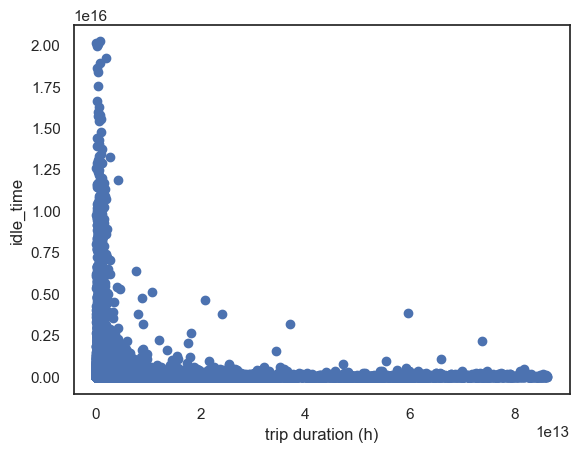

In [260]:
plt.scatter(x, y)
plt.xlabel('trip duration (h)')
plt.ylabel('idle_time')

# station distance

In [261]:
san_fran_df['station_distance'].describe()

count    1.362601e+06
mean     1.662067e+00
std      1.004369e+00
min      0.000000e+00
25%      9.349605e-01
50%      1.457943e+00
75%      2.172484e+00
max      6.530812e+01
Name: station_distance, dtype: float64

In [262]:
#define a function that will check for outliers in a specified column
def check_outlier(column):
    """
    Takes 'column' as the feature (column) in baywheels_df that will be checked for outliers
    """
    unique_values = san_fran_df[column].unique()
    largest_unique_values = sorted(unique_values, reverse=True)[:10]
    smallest_unique_values = sorted(unique_values)[:10]
    print(f"largest outliers in {column}: {largest_unique_values}")
    print(f"smallest outliers in {column}:{smallest_unique_values}")

In [263]:
check_outlier('station_distance')

largest outliers in station_distance: [65.30812497359086, 16.554505913816673, 15.453959256313478, 15.267686544328146, 14.817883140943849, 14.455835915605888, 14.095063303874277, 14.046740328226724, 14.020582349620389, 13.95277779405747]
smallest outliers in station_distance:[0.0, 0.0133070687183611, 0.0220028336614077, 0.0775642916346313, 0.1218838620614592, 0.123870438265081, 0.1414923513217342, 0.1526957161289509, 0.1596110645456167, 0.1619709513194011]


In [264]:
#cluster the stations in three groups
from sklearn.cluster import KMeans

X = san_fran_df[['end_station_lat','end_station_lon']]

kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(X)

# Get the cluster labels for each station
san_fran_df['end_area_label'] = kmeans.labels_
san_fran_df.head()

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist,end_area_label
0,2018-01-02 07:32:44,2018-01-02 07:44:36,60,37.774520,-122.409449,324,37.788300,-122.408531,17,0 days 00:11:52,NaT,1 days 07:32:44,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.65,1021.65,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.531567,2,0 days 01:32:38,1.089257,2.547089,2
1,2018-01-02 09:17:14,2018-01-02 09:23:41,324,37.788300,-122.408531,37,37.785000,-122.395936,17,0 days 00:06:27,0 days 01:32:38,0 days 13:09:25,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.31,1021.31,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.168362,2,0 days 19:49:39,1.753276,1.400463,2
2,2018-01-03 05:13:20,2018-01-03 05:15:55,37,37.785000,-122.395936,21,37.789625,-122.400811,17,0 days 00:02:35,0 days 19:49:39,0 days 00:00:00,14.0,14.0,26.0,26.0,Cloudy,Cloudy,1018.60,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,2,0,0.0,3,0,0.669345,2,0 days 07:33:35,1.075981,1.022033,2
3,2018-01-03 12:49:30,2018-01-03 13:11:05,53,37.775946,-122.437777,5,37.783899,-122.408445,17,0 days 00:21:35,0 days 07:33:35,0 days 00:00:00,12.0,12.0,27.0,27.0,Mostly Cloudy,Mostly Cloudy,1016.57,1016.57,6.0,6.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,2.730661,2,0 days 03:10:19,3.581626,4.318992,2
4,2018-01-03 16:21:24,2018-01-03 16:26:19,5,37.783899,-122.408445,25,37.787522,-122.397405,17,0 days 00:04:55,0 days 03:10:19,0 days 06:49:53,11.0,12.0,28.0,26.0,Mostly Cloudy,Cloudy,1016.23,1016.57,0.0,7.0,0.0,0.0,11.0,12.0,2,0,-1.0,2,0,1.052319,2,0 days 00:12:10,1.376076,1.677306,2


In [265]:
#make a end_stations_df to use for displaying locations 
columns = ['end_station_id','end_station_lat','end_station_lon']
end_stations_df = san_fran_df[columns]
end_stations_df = end_stations_df.drop_duplicates(subset=['end_station_id'])

end_stations_df.head()


,end_station_id,end_station_lat,end_station_lon
0,324,37.788300,-122.408531
1,37,37.785000,-122.395936
2,21,37.789625,-122.400811
3,5,37.783899,-122.408445
4,25,37.787522,-122.397405


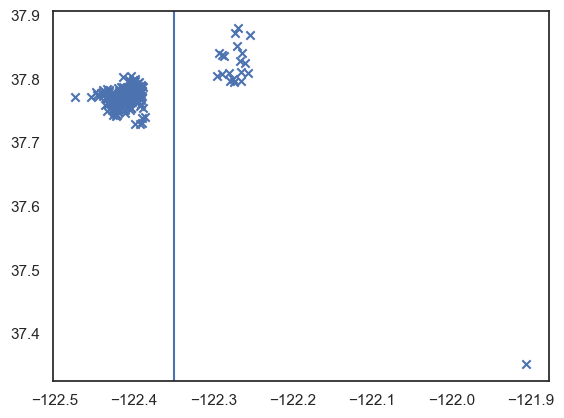

In [266]:
#plot the end_stations locations to see the outliers
x = end_stations_df['end_station_lat']
y = end_stations_df['end_station_lon']
plt.scatter(y,x, marker='x')
plt.axvline(x=-122.35)

We will drop the rows where the bikes have left the San Francisco area, because our model also predicts on the data from San Francisco area

In [267]:
#rows that we will drop from the san_fran_df_geo
rows_to_drop = san_fran_df[san_fran_df['end_station_lon'] > -122.35]
rows_to_drop

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist,end_area_label
38899,2018-08-15 17:06:54,2018-08-15 22:44:21,9,37.798572,-122.400869,151,37.836182,-122.287180,166,0 days 05:37:27,0 days 08:16:02,1 days 20:33:56,18.0,21.0,26.0,34.0,Cloudy,Fair / Windy,1014.88,1013.86,15.0,35.0,0.00,0.00,18.0,21.0,2,0,-3.0,2,0,10.845829,2,0 days 21:52:53,2.598216,0.751469,2
79097,2018-03-29 14:25:47,2018-03-29 20:29:44,16,37.794130,-122.394430,303,37.352601,-121.905733,319,0 days 06:03:57,0 days 02:21:02,0 days 22:15:38,13.0,24.0,30.0,30.0,Partly Cloudy,Partly Cloudy,1018.26,1018.26,6.0,0.0,0.00,0.00,13.0,24.0,3,0,-11.0,0,0,65.308125,2,16 days 11:20:59,2.097742,0.000000,0
82666,2018-06-06 21:26:16,2018-06-06 22:10:49,41,37.781270,-122.418740,156,37.838443,-122.288665,327,0 days 00:44:33,1 days 01:01:57,0 days 04:25:58,17.0,17.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1013.52,1013.52,30.0,30.0,0.00,0.00,17.0,17.0,2,0,0.0,3,0,13.094658,2,NaT,2.013890,2.573468,2
104075,2018-02-15 19:49:36,2018-02-15 21:13:04,93,37.770407,-122.391198,219,37.809824,-122.280192,418,0 days 01:23:28,0 days 00:33:57,3 days 10:54:41,14.0,16.0,34.0,34.0,Fair,Fair,1025.71,1024.70,0.0,11.0,0.00,0.00,14.0,16.0,3,0,-2.0,2,0,10.711788,2,NaT,0.757822,2.648372,2
195032,2018-07-14 17:41:41,2018-07-14 22:16:50,10,37.795393,-122.404770,202,37.800754,-122.274894,755,0 days 04:35:09,0 days 00:05:29,13 days 00:18:37,19.0,19.0,34.0,30.0,Fair,Partly Cloudy / Windy,1017.59,1015.89,24.0,33.0,0.00,0.00,19.0,19.0,5,1,0.0,3,0,11.454000,2,5 days 18:10:59,2.323977,0.921460,2
234929,2018-01-29 16:42:03,2018-01-30 12:54:27,108,37.764710,-122.419957,163,37.797320,-122.265320,972,0 days 20:12:24,0 days 03:22:03,1 days 22:28:01,12.0,11.0,28.0,29.0,Mostly Cloudy,Partly Cloudy,1024.36,1020.29,6.0,0.0,0.00,0.00,12.0,11.0,0,0,1.0,4,0,14.095063,2,1 days 05:36:44,2.332390,3.964820,2
255829,2018-12-05 17:28:41,2018-12-05 18:21:54,363,37.787492,-122.398285,187,37.796248,-122.279352,1060,0 days 00:53:13,2 days 04:53:06,0 days 08:47:12,11.0,11.0,12.0,11.0,Rain,Light Rain,1012.17,1012.51,11.0,17.0,0.25,0.76,11.0,11.0,2,0,0.0,3,0,10.520586,2,NaT,1.351292,0.811226,2
270081,2018-09-21 19:14:05,2018-09-21 19:52:47,58,37.776619,-122.417385,241,37.852477,-122.270213,1107,0 days 00:38:42,0 days 00:12:50,0 days 02:27:29,21.0,22.0,30.0,34.0,Partly Cloudy,Fair,1014.54,1014.54,15.0,15.0,0.00,0.00,21.0,22.0,4,0,-1.0,2,0,15.453959,2,NaT,1.789977,2.804683,2
324499,2018-11-02 01:08:53,2018-11-02 16:23:36,44,37.781074,-122.411738,196,37.808894,-122.256460,1298,0 days 15:14:43,0 days 01:22:16,22 days 16:29:45,22.0,16.0,28.0,34.0,Mostly Cloudy,Fair,1017.92,1020.63,22.0,0.0,0.00,0.00,22.0,16.0,4,0,6.0,5,0,14.020582,2,10 days 18:51:14,1.435093,2.103433,2
535089,2018-08-15 17:08:46,2018-08-15 22:00:54,9,37.798572,-122.400869,155,37.840521,-122.293528,2022,0 days 04:52:08,0 days 08:28:09,1 days 09:51:58,18.0,21.0,26.0,34.0,Cloudy,Fair,1014.88,1014.54,15.0,28.0,0.00,0.00,18.0,21.0,2,0,-3.0,2,0,10.535709,2,NaT,2.598216,0.751469,2


In [268]:
#drop the rows
san_fran_df.drop(rows_to_drop.index, inplace=True)

In [269]:
san_fran_df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist,end_area_label
0,2018-01-02 07:32:44,2018-01-02 07:44:36,60,37.774520,-122.409449,324,37.788300,-122.408531,17,0 days 00:11:52,NaT,1 days 07:32:44,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.65,1021.65,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.531567,2,0 days 01:32:38,1.089257,2.547089,2
1,2018-01-02 09:17:14,2018-01-02 09:23:41,324,37.788300,-122.408531,37,37.785000,-122.395936,17,0 days 00:06:27,0 days 01:32:38,0 days 13:09:25,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.31,1021.31,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.168362,2,0 days 19:49:39,1.753276,1.400463,2
2,2018-01-03 05:13:20,2018-01-03 05:15:55,37,37.785000,-122.395936,21,37.789625,-122.400811,17,0 days 00:02:35,0 days 19:49:39,0 days 00:00:00,14.0,14.0,26.0,26.0,Cloudy,Cloudy,1018.60,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,2,0,0.0,3,0,0.669345,2,0 days 07:33:35,1.075981,1.022033,2
3,2018-01-03 12:49:30,2018-01-03 13:11:05,53,37.775946,-122.437777,5,37.783899,-122.408445,17,0 days 00:21:35,0 days 07:33:35,0 days 00:00:00,12.0,12.0,27.0,27.0,Mostly Cloudy,Mostly Cloudy,1016.57,1016.57,6.0,6.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,2.730661,2,0 days 03:10:19,3.581626,4.318992,2
4,2018-01-03 16:21:24,2018-01-03 16:26:19,5,37.783899,-122.408445,25,37.787522,-122.397405,17,0 days 00:04:55,0 days 03:10:19,0 days 06:49:53,11.0,12.0,28.0,26.0,Mostly Cloudy,Cloudy,1016.23,1016.57,0.0,7.0,0.0,0.0,11.0,12.0,2,0,-1.0,2,0,1.052319,2,0 days 00:12:10,1.376076,1.677306,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362596,2018-12-31 13:07:21,2018-12-31 13:21:59,364,37.772886,-122.389940,3,37.786375,-122.404904,6234,0 days 00:14:38,0 days 01:16:38,5 days 01:46:03,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.994864,2,0 days 02:15:45,0.690035,2.390883,2
1362597,2018-12-31 15:37:44,2018-12-31 15:59:07,3,37.786375,-122.404904,24,37.789677,-122.390428,6234,0 days 00:21:23,0 days 02:15:45,19 days 05:43:16,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.326710,2,0 days 01:50:53,1.402139,1.261757,2
1362598,2018-12-31 17:50:00,2018-12-31 18:00:09,24,37.789677,-122.390428,78,37.773717,-122.411647,6234,0 days 00:10:09,0 days 01:50:53,20 days 01:03:02,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,2.575179,2,0 days 01:43:51,1.695992,0.607074,1
1362599,2018-12-31 19:44:00,2018-12-31 19:55:02,78,37.773717,-122.411647,119,37.761047,-122.432642,6234,0 days 00:11:02,0 days 01:43:51,0 days 01:42:45,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,2.323699,2,0 days 01:19:27,1.291739,2.726417,1


largest outliers in station_distance: [8.288831474684486, 7.865899391796463, 7.745730054682276, 7.500420107580924, 7.489437180808874, 7.449095270579806, 7.444763915123908, 7.432497537701852, 7.369841455423831, 7.338955225897247]
smallest outliers in station_distance:[0.0, 0.0133070687183611, 0.0220028336614077, 0.0775642916346313, 0.1218838620614592, 0.123870438265081, 0.1414923513217342, 0.1526957161289509, 0.1596110645456167, 0.1619709513194011]


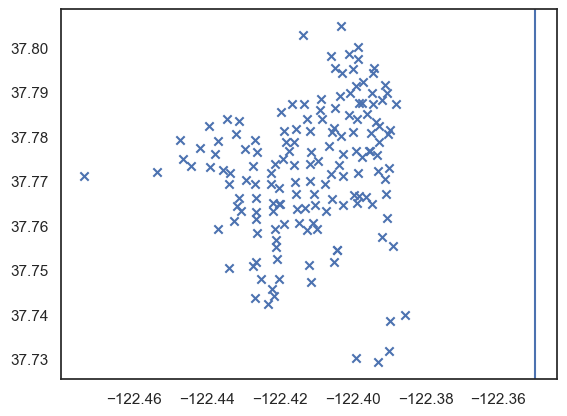

In [270]:
#check if the drop worked by ploting the station locations 
columns = ['end_station_id','end_station_lat','end_station_lon']
end_stations_df = san_fran_df[columns]
end_stations_df = end_stations_df.drop_duplicates(subset=['end_station_id'])
x = end_stations_df['end_station_lat']
y = end_stations_df['end_station_lon']
plt.scatter(y,x, marker='x')
plt.axvline(x=-122.35)
check_outlier('station_distance')

(-0.5, 8.70327304841871)

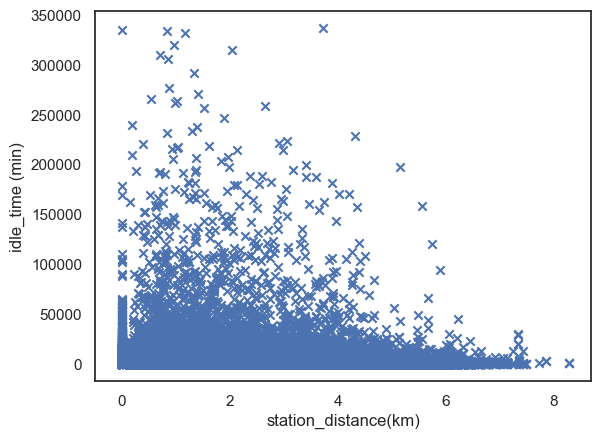

In [271]:
#plot the station_distance and idle_time on scatter plot
x = san_fran_df['station_distance']
y = san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.scatter(x, y, marker='x')
plt.xlabel('station_distance(km)')
plt.ylabel('idle_time (min)')
plt.xlim(left=-0.5)

Text(0, 0.5, 'number of trips')

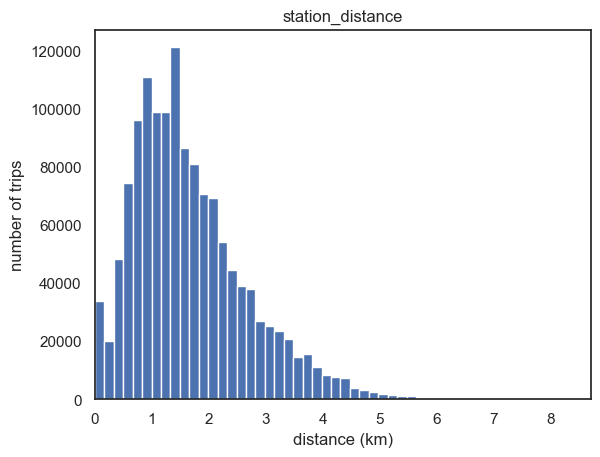

In [272]:
x = san_fran_df['station_distance']
plt.hist(x, bins=50)
plt.xlim(left=0)  # Set the lower and upper limits for the x-axis
plt.title('station_distance')
plt.xlabel('distance (km)')
plt.ylabel('number of trips')

# Feature selection using the Pearson's correlation coefficient via f_regression
The **f_regression** is derived from the **r_regression**, which uses the Pearsons's r or also called the Pearson's correlation coefficient for performing F-test on selected features. **f_regression** is a scoring function used in feature selection procedure. It could also be used in `sklearn's` `SelectKBest` class to select the features all at once. The computed cross_correlation between regressor and target is then converted to an 
*F score* and then to a *p-value*.

The *F score* is computed from the *R^2*. Bigger *R^2* values lead to higher values of *F* -> the higher the *F score* is the better.

In [273]:
from sklearn.feature_selection import f_regression
def feature_selection(f):
    """ 
    Uses Pearson's correlation coefficient via f_regression
    f = feature that is examined
    """
    X = san_fran_df[f].values.reshape(-1,1)
    y = san_fran_df['idle_time'].dt.total_seconds() / 60.0
    # Apply f_regression
    f_scores, p_values = f_regression(X, y)
    # Print results
    print("F-scores:", f_scores)
    print("p-values:", p_values)
    

In [274]:
#drop NaT values from the idle_time column (one for every unique bike ID - the first rental in the year)
san_fran_df.dropna(subset=['idle_time'], inplace=True)

In [275]:
san_fran_df['idle_time']

1         0 days 01:32:38
2         0 days 19:49:39
3         0 days 07:33:35
4         0 days 03:10:19
5         0 days 00:12:10
                ...      
1362596   0 days 01:16:38
1362597   0 days 02:15:45
1362598   0 days 01:50:53
1362599   0 days 01:43:51
1362600   0 days 01:19:27
Name: idle_time, Length: 1359874, dtype: timedelta64[ns]

### start_temperature

In [341]:
feature_selection('start_temperature')

F-scores: [2897.50052353]
p-values: [0.]


### Weekday

In [276]:
feature_selection('Weekday')

F-scores: [143.25605506]
p-values: [5.18689241e-33]


### trip_duration

In [277]:
feature_selection('trip_duration')

F-scores: [58.33182742]
p-values: [2.215759e-14]


### station_distance

In [278]:
feature_selection('station_distance')

F-scores: [776.27636023]
p-values: [8.67605973e-171]


### Is_Weekend

In [279]:
feature_selection('Is_Weekend')

F-scores: [1028.54256952]
p-values: [1.36399226e-225]


### rain_start

In [280]:
feature_selection('rain_start')

F-scores: [18.36857621]
p-values: [1.82047987e-05]


### start_precipitation

In [281]:
feature_selection('start_precipitation')

F-scores: [155.35078657]
p-values: [1.17893037e-35]


### start_station_central_station_dist

In [282]:
feature_selection('start_station_central_station_dist')

F-scores: [5137.28843329]
p-values: [0.]


Text(0, 0.5, 'idle_time_end (minutes)')

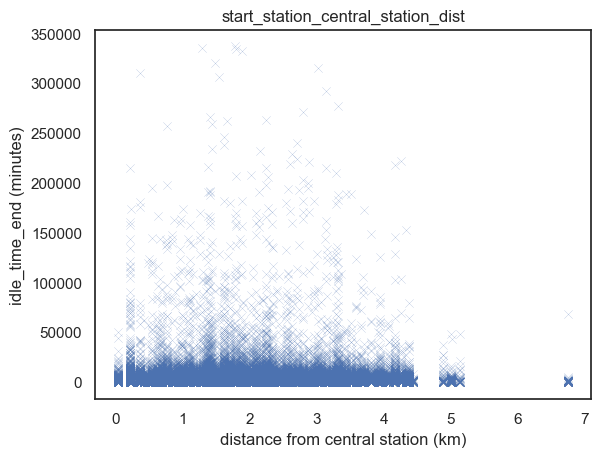

In [283]:
x= san_fran_df['start_station_central_station_dist']
y= san_fran_df['idle_time_end'].dt.total_seconds() / 60.0
plt.scatter(x,y, marker='x', linewidths=0.1)
plt.title('start_station_central_station_dist')
plt.xlabel('distance from central station (km)')
plt.ylabel('idle_time_end (minutes)')

In [284]:
#try to plot it using the distance to mean
data = san_fran_df['idle_time']
mean_raw = data.mean()
mean = data.mean().total_seconds() / 60.0
centered_data = data.dt.total_seconds() / 60.0 - mean
print("mean in timedelata dtype:",mean_raw)
print("mean in minutes:",mean)
print(centered_data)


mean in timedelata dtype: 0 days 09:26:30.171383525
mean in minutes: 566.5028563833333
1         -473.869523
2          623.147144
3         -112.919523
4         -376.186190
5         -554.336190
              ...    
1362596   -489.869523
1362597   -430.752856
1362598   -455.619523
1362599   -462.652856
1362600   -487.052856
Name: idle_time, Length: 1359874, dtype: float64


(-20000.0, 353184.9521436167)

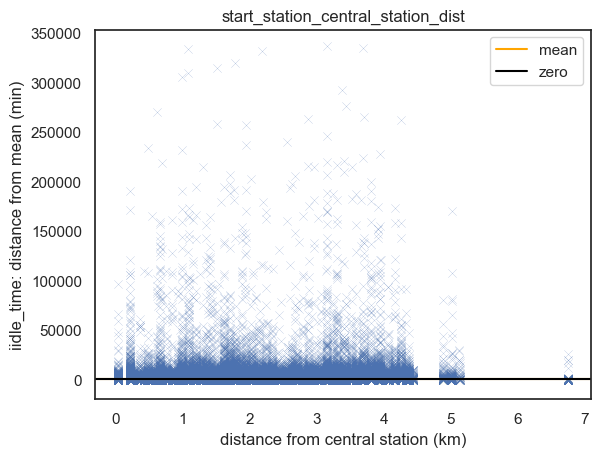

In [285]:
#plot the centered_data distribution
x= san_fran_df['start_station_central_station_dist']
y_centered = centered_data
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_central_station_dist')
plt.xlabel('distance from central station (km)')
plt.ylabel('iidle_time: distance from mean (min)')
plt.legend()
plt.ylim(-20000)

(-1000.0, 40000.0)

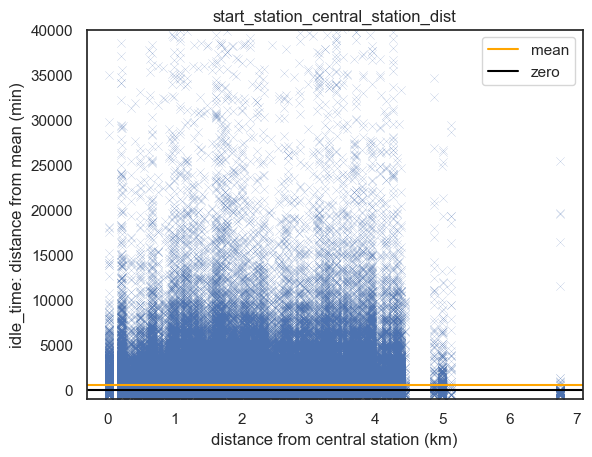

In [286]:
#show idle_time distance from mean < 40000
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_central_station_dist')
plt.xlabel('distance from central station (km)')
plt.ylabel('idle_time: distance from mean (min)')
plt.legend()
plt.ylim(-1000, 40000)

Text(0, 0.5, 'number of trips')

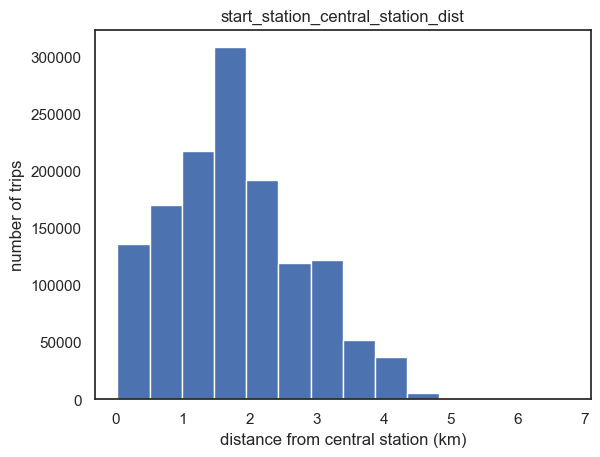

In [287]:
#check the distribution of the start_station_central_station_dist
x= san_fran_df['start_station_central_station_dist']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.hist(x, bins=14)
plt.title('start_station_central_station_dist')
plt.xlabel('distance from central station (km)')
plt.ylabel('number of trips')

### start_station_ferry_building_dist

In [288]:
feature_selection('start_station_ferry_building_dist')

F-scores: [8035.85880936]
p-values: [0.]


Text(0, 0.5, 'idle_time (minutes)')

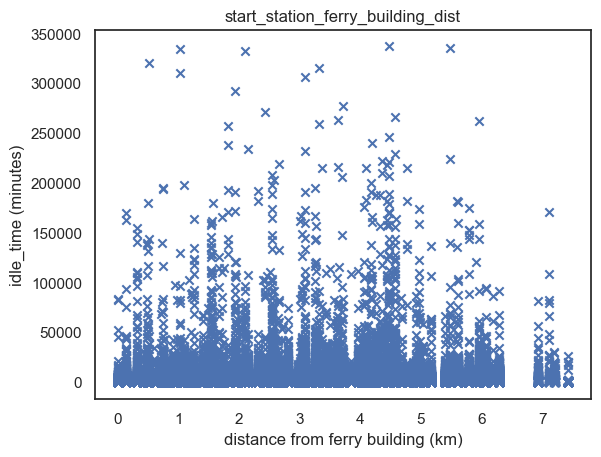

In [289]:
x= san_fran_df['start_station_ferry_building_dist']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.scatter(x,y, marker='x')
plt.title('start_station_ferry_building_dist')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('idle_time (minutes)')

Text(0, 0.5, 'number of trips')

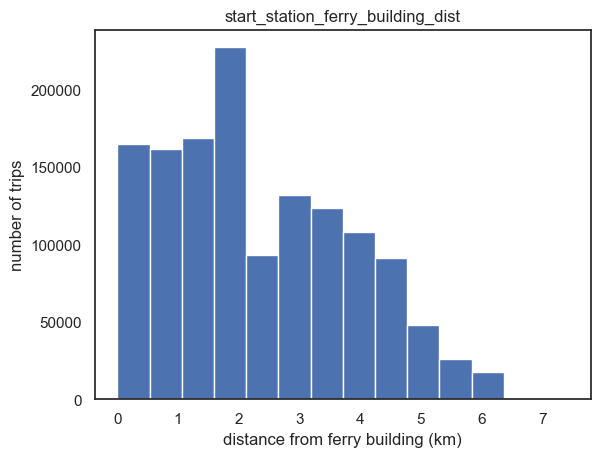

In [290]:
#check the distribution of the start_station_central_station_dist
x= san_fran_df['start_station_ferry_building_dist']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.hist(x, bins=14)
plt.title('start_station_ferry_building_dist')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('number of trips')

(-20000.0, 353184.9521436167)

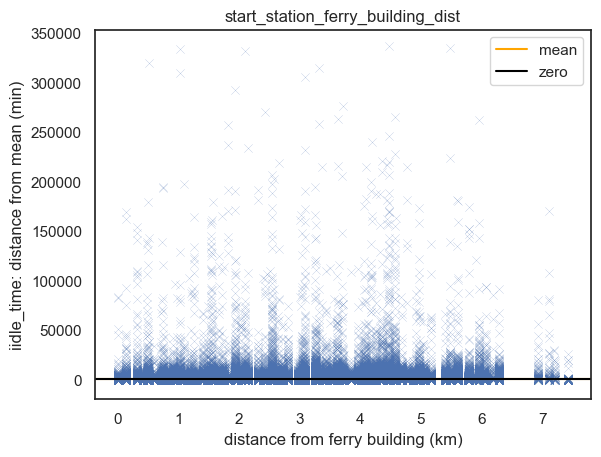

In [291]:
#plot the centered_data distribution
x= san_fran_df['start_station_ferry_building_dist']
y_centered = centered_data
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_ferry_building_dist')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('iidle_time: distance from mean (min)')
plt.legend()
plt.ylim(-20000)

(-1000.0, 40000.0)

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


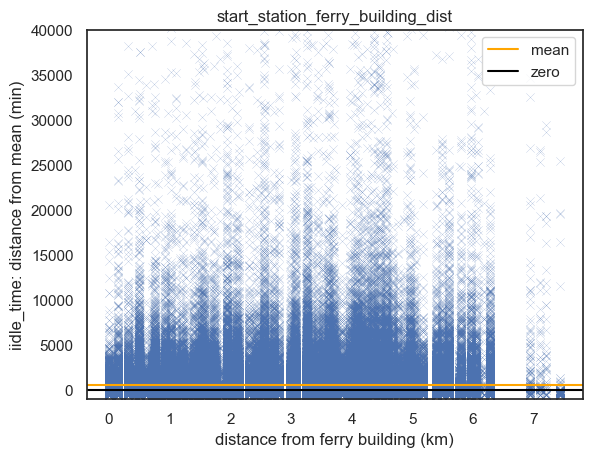

In [292]:
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_ferry_building_dist')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('iidle_time: distance from mean (min)')
plt.legend()
plt.ylim(-1000, 40000)

### start_station_twitter_HQ_dist

In [355]:
feature_selection('start_station_twitter_HQ_dist')

F-scores: [37.7325832]
p-values: [8.11602693e-10]


This shows that there is no big correlation between **idle_time** and the **start_station_twitter_HQ_dist**

(-20000.0, 353184.9521436167)

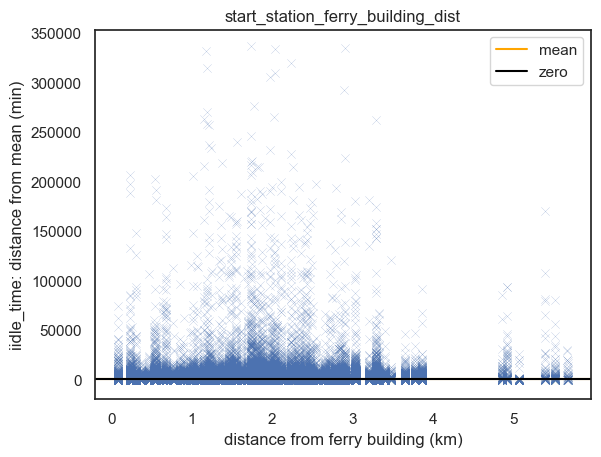

In [356]:
x= san_fran_df['start_station_twitter_HQ_dist']
y_centered = centered_data
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_ferry_building_dist')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('iidle_time: distance from mean (min)')
plt.legend()
plt.ylim(-20000)

### start_felt_temperature

In [293]:
feature_selection('start_felt_temperature')

F-scores: [3009.82581533]
p-values: [0.]


Text(0, 0.5, 'idle_time_end /minutes')

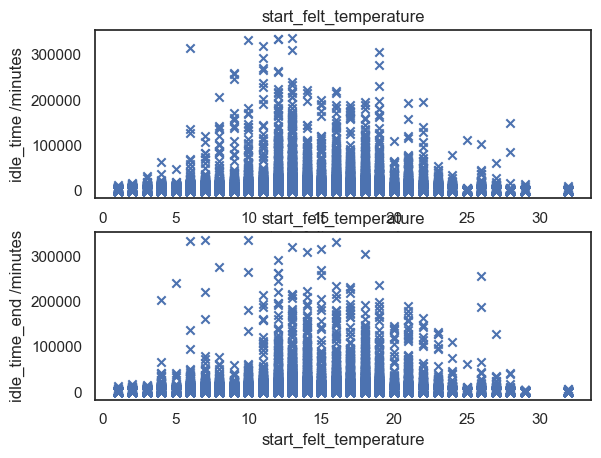

In [294]:
#plotting the start_felt_temperature and idle_time to examine the values
san_fran_df_geo['idle_time_end'] = pd.to_timedelta(san_fran_df_geo['idle_time_end'])
x= san_fran_df['start_felt_temperature']
y_1= san_fran_df['idle_time'].dt.total_seconds() / 60.0
y_2= san_fran_df['idle_time_end'].dt.total_seconds() / 60.0
fig,ax = plt.subplots(2,1)
ax[0].scatter(x,y_1, marker='x')
ax[0].set_title('start_felt_temperature')
ax[0].set_xlabel('start_felt_temperature')
ax[0].set_ylabel('idle_time /minutes')
ax[1].scatter(x,y_2, marker='x')
ax[1].set_title('start_felt_temperature')
ax[1].set_xlabel('start_felt_temperature')
ax[1].set_ylabel('idle_time_end /minutes')

Text(0, 0.5, 'number of trips')

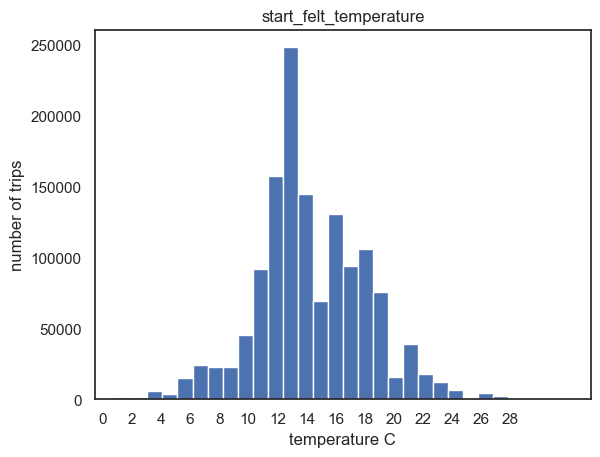

In [295]:
#check the distribution of the start_felt_temperature
x= san_fran_df['start_felt_temperature']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.hist(x, bins=30)
plt.xticks(np.arange(0,30,2))
plt.title('start_felt_temperature')
plt.xlabel('temperature C')
plt.ylabel('number of trips')

(-3000.0, 60000.0)

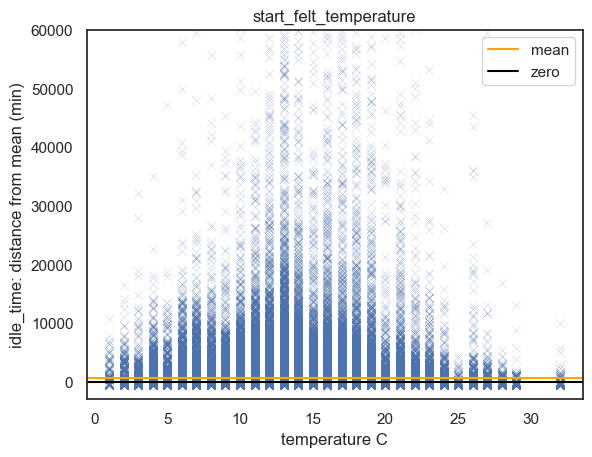

In [296]:
x=san_fran_df['start_felt_temperature']
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_felt_temperature')
plt.xlabel('temperature C')
plt.ylabel('idle_time: distance from mean (min)')
plt.legend()
plt.ylim(-3000, 60000)

### end_felt_temperature

In [297]:
feature_selection('end_felt_temperature')

F-scores: [3115.83887915]
p-values: [0.]


end_felt_temperature is a better predictor for idle_time, it makes sense due to the nature of the idle time, where it naturally depends more on the temperature at the end of the ride, rather than at the beginning

Text(0, 0.5, 'idle_time /minutes')

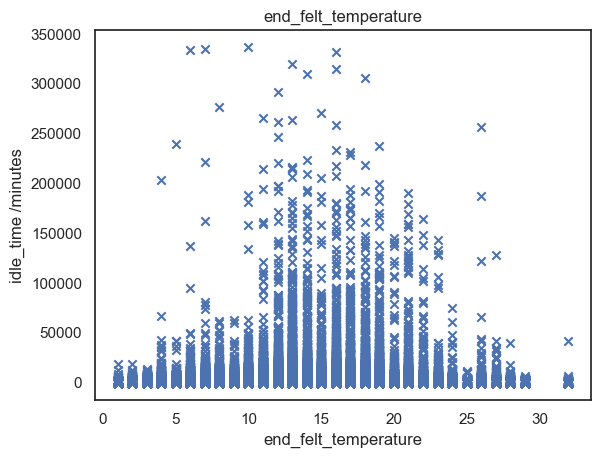

In [304]:
x= san_fran_df['end_felt_temperature']
y= san_fran_df['idle_time_end'].dt.total_seconds() / 60.0
plt.scatter(x,y, marker='x')
plt.title('end_felt_temperature')
plt.xlabel('end_felt_temperature')
plt.ylabel('idle_time /minutes')

Text(0, 0.5, 'number of trips')

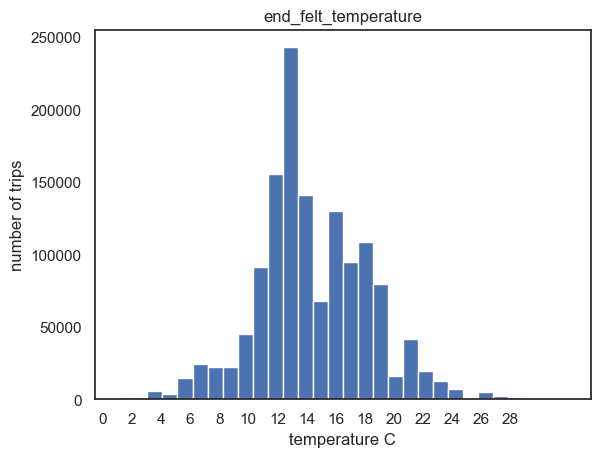

In [305]:
#check the distribution of the start_felt_temperature
x= san_fran_df['end_felt_temperature']
y= san_fran_df['idle_time_end'].dt.total_seconds() / 60.0
plt.hist(x, bins=30)
plt.xticks(np.arange(0,30,2))
plt.title('end_felt_temperature')
plt.xlabel('temperature C')
plt.ylabel('number of trips')

### start_cloud_cover

In [311]:
feature_selection('start_cloud_cover')

F-scores: [420.00843049]
p-values: [2.51049799e-93]


### Is_Weekend

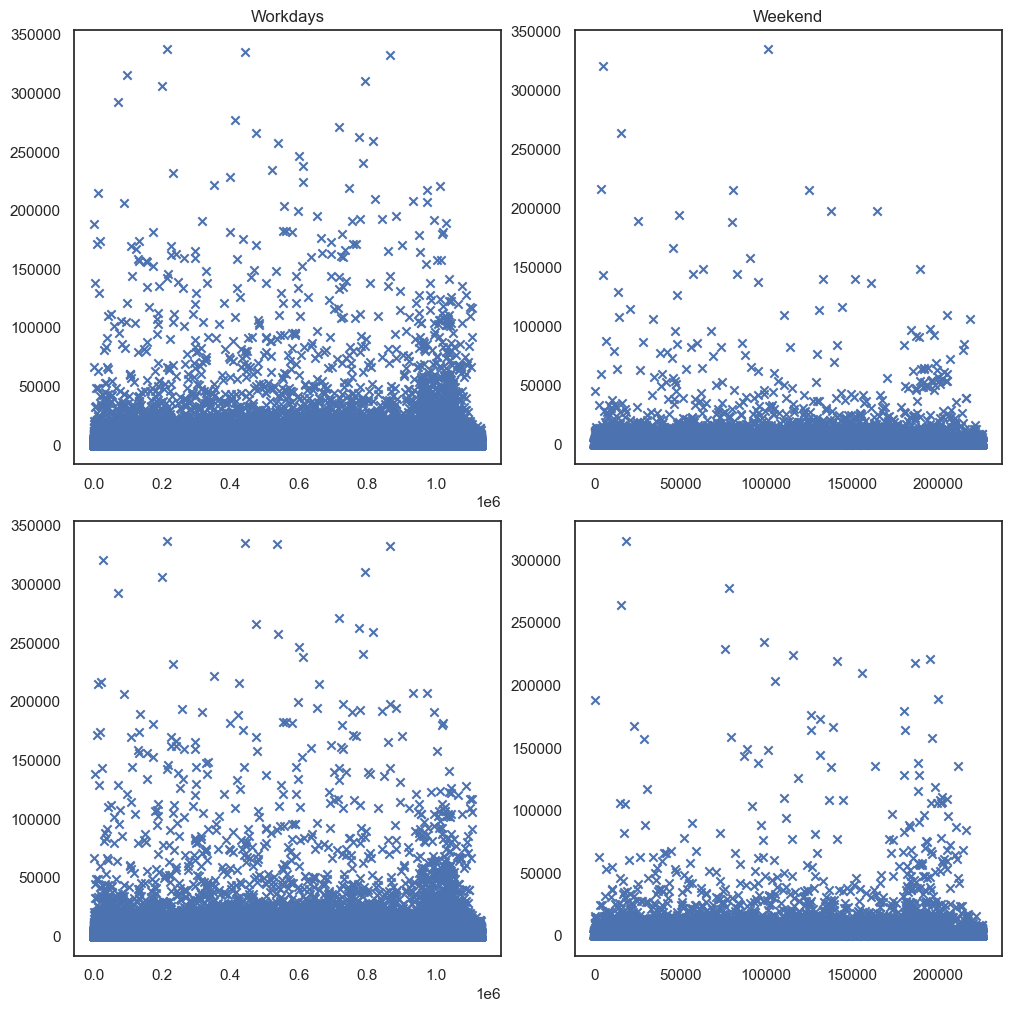

In [307]:
#plot the differences between idle_time and idle_time_end and workday x weekend
y_1 = san_fran_df[san_fran_df['Is_Weekend'] == 0]['idle_time'].dt.total_seconds()/60
x_1 = np.arange(len(y_1))
y_2 = san_fran_df[san_fran_df['Is_Weekend'] == 1]['idle_time'].dt.total_seconds() /60
x_2 = np.arange(len(y_2))
y_3 = san_fran_df[san_fran_df['Is_Weekend'] == 0]['idle_time_end'].dt.total_seconds() /60
x_3 = np.arange(len(y_3))
y_4 = san_fran_df[san_fran_df['Is_Weekend'] == 1]['idle_time_end'].dt.total_seconds() /60
x_4 = np.arange(len(y_4))
fig, axs = plt.subplots(2,2, figsize=(10,10),constrained_layout=True)
axs[0,0].scatter(x_1,y_1, marker='x')
axs[0,0].set_title('Workdays')
axs[0,1].scatter(x_2,y_2, marker='x')
axs[1,0].scatter(x_3,y_3, marker='x')
axs[0,1].set_title('Weekend')
axs[1,1].scatter(x_4,y_4, marker='x')

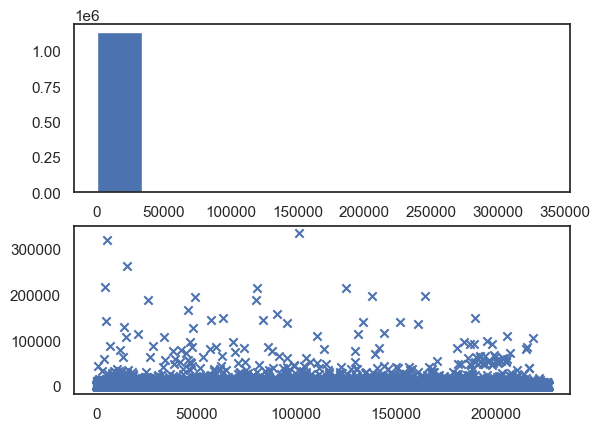

In [301]:
fig, axs = plt.subplots(2,1)
axs[0].hist(y_1)
axs[1].scatter(x_2,y_2, marker='x')

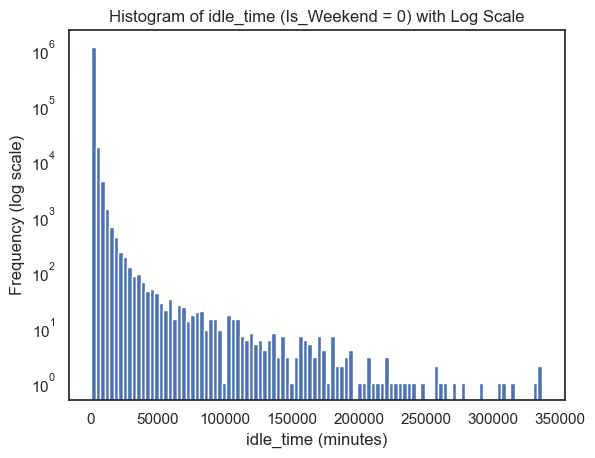

In [302]:
y = san_fran_df[san_fran_df['Is_Weekend'] == 0]['idle_time'].dt.total_seconds() / 60.0

# Create histogram with logarithmic scale on y-axis
plt.hist(y, bins=100,log=True)
plt.xlabel('idle_time (minutes)')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of idle_time (Is_Weekend = 0) with Log Scale')
plt.show()


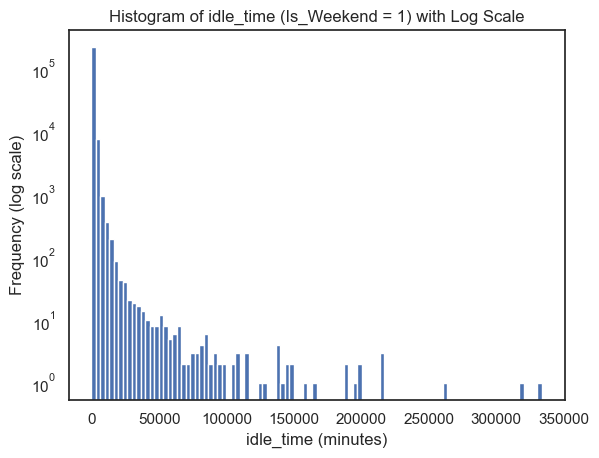

In [303]:
y = san_fran_df[san_fran_df['Is_Weekend'] == 1]['idle_time'].dt.total_seconds() / 60.0

# Create histogram with logarithmic scale on y-axis
plt.hist(y, bins=100, log=True)
plt.xlabel('idle_time (minutes)')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of idle_time (Is_Weekend = 1) with Log Scale')
plt.show()

In [316]:
san_fran_df.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_lat', 'start_station_lon', 'end_station_id', 'end_station_lat', 'end_station_lon', 'bike_id', 'trip_duration', 'idle_time', 'station_idle_time', 'start_temperature', 'end_temperature', 'start_cloud_cover', 'end_cloud_cover', 'start_cloud_cover_description', 'end_cloud_cover_description', 'start_pressure', 'end_pressure', 'start_windspeed', 'end_windspeed', 'start_precipitation', 'end_precipitation', 'start_felt_temperature', 'end_felt_temperature', 'Weekday', 'Is_Weekend', 'temperature_dif', 'temperature_dif_category', 'rain_start', 'station_distance', 'area_label', 'idle_time_end', 'start_station_central_station_dist', 'start_station_ferry_building_dist', 'end_area_label'], dtype='object')

## Using the SelectKBest class from sklearn

In [357]:
#try to choose the best feature for predicting of idle_time by using the selectKBest class from sklearn
from sklearn.feature_selection import SelectKBest
x = san_fran_df[['start_temperature', 'end_temperature',
                 'start_cloud_cover', 'end_cloud_cover',
                 'start_pressure', 'end_pressure', 'start_windspeed', 'end_windspeed', 'start_precipitation', 
                 'end_precipitation', 'start_felt_temperature', 'end_felt_temperature', 'Weekday', 'Is_Weekend',
                 'temperature_dif','rain_start', 'station_distance', 'start_station_central_station_dist',
                 'start_station_ferry_building_dist', 'start_station_twitter_HQ_dist']]
y = san_fran_df['idle_time'].dt.total_seconds() / 60.0
print("Feature data dimension:", x.shape)
select = SelectKBest(score_func=f_regression, k=5)
x_selected = select.fit_transform(x,y)
print("After selecting best 7 features:", x_selected.shape) 

Feature data dimension: (1359874, 20)
After selecting best 7 features: (1359874, 5)


In [358]:
selected_indices = select.get_support(indices=True)

# Get the names of the selected features
selected_features = [x.columns[idx] for idx in selected_indices]
selected_values = pd.DataFrame(x_selected, columns=selected_features)
selected_feature_scores = pd.DataFrame({"Feature": selected_features, "Score": selected_scores})
selected_scores = select.scores_[selected_indices]
print("Selected features with scores:")
print(selected_feature_scores)
print("Shape of the selected feature matrix:", x_selected.shape)

Selected features with scores:
                              Feature        Score
0                     end_temperature  3002.158492
1              start_felt_temperature  3009.825815
2                end_felt_temperature  3115.838879
3  start_station_central_station_dist  5137.288433
4   start_station_ferry_building_dist  8035.858809
Shape of the selected feature matrix: (1359874, 5)


The SelectKBest class form sklearn show us that the features with the biggest correlation with idle_time are the distance to the points of interest that we have chosen using the visual map exploration of the stations and their respective numbers of interactions. For the prediction model we will use the two distance features: **start_station_central_station_dist,start_station_ferry_building_dist** and the **end_felt_temperature feature**.

## Building the prediction models:

# 1) Linear regression